In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

connection_string = f"group5:Group5Project@nbastats2.c4lr0vlcqzd5.us-east-1.rds.amazonaws.com:5432/NBA_Stats"
engine = create_engine(f'postgresql://{connection_string}')

In [45]:
mvp = pd.read_csv("Data/AllPlayerData.csv")
mvp = mvp.drop("Table Name", axis = 1)
mvp = mvp.drop("Rk", axis = 1)
mvp = mvp.drop("MVP", axis =1)
mvp_2020 = mvp.loc[mvp["Season"] == "2019-20"]
mvp = mvp.loc[mvp["Season"] != "2019-20"]
mvp_2019 = mvp.loc[mvp["Season"] == "2018-19"]
mvp_2018 = mvp.loc[mvp["Season"] == "2017-18"]
mvp_2017 = mvp.loc[mvp["Season"] == "2016-17"]

In [47]:
mvp.columns

Index(['Player', 'PlayerID', 'Pos', 'Season', 'Tm', '2P', '2P%', '2PA', '3P',
       '3P%', '3PA', 'Age', 'AST', 'BLK', 'DRB', 'eFG%', 'FG', 'FG%', 'FGA',
       'FT', 'FT%', 'FTA', 'G', 'GS', 'MP', 'ORB', 'PF', 'PTS', 'STL', 'TOV',
       'TRB'],
      dtype='object')

In [48]:
mvp_votes = pd.read_csv("Data/MVP.csv")
mvp_votes = mvp_votes[["Player", "Season"]]
mvp_votes["MVP_Candidate"] = 1
mvp_votes

,Player,Season,MVP_Candidate
0,Allen Iverson,2000-01,1
1,Tim Duncan,2000-01,1
2,Shaquille O'Neal,2000-01,1
3,Chris Webber,2000-01,1
4,Kevin Garnett,2000-01,1
...,...,...,...
266,Kevin Durant,2018-19,1
267,Kawhi Leonard,2018-19,1
268,Russell Westbrook,2018-19,1
269,Rudy Gobert,2018-19,1


In [49]:
mvp = pd.merge(mvp, mvp_votes, how='left', on=["Player", "Season"])
mvp["MVP_Candidate"] = mvp["MVP_Candidate"].fillna(0)

In [50]:
mvp_2020 = pd.merge(mvp_2020, mvp_votes, how='left', on=["Player", "Season"])
mvp_2020

,Player,PlayerID,Pos,Season,Tm,2P,2P%,2PA,3P,3P%,...,G,GS,MP,ORB,PF,PTS,STL,TOV,TRB,MVP_Candidate
0,Steven Adams,adamsst01,C,2019-20,OKC,261,0.593,440,1,0.333,...,58,58,1564,196,111,633,50,86,543,NaN
1,Bam Adebayo,adebaba01,PF,2019-20,MIA,407,0.576,706,1,0.077,...,65,65,2235,165,164,1053,78,185,683,NaN
2,LaMarcus Aldridge,aldrila01,C,2019-20,SAS,330,0.519,636,61,0.389,...,53,53,1754,103,128,1001,36,74,392,NaN
3,Nickeil Alexander-Walker,alexani01,SG,2019-20,NOP,37,0.336,110,40,0.342,...,41,0,501,8,46,211,11,40,80,NaN
4,Grayson Allen,allengr01,SG,2019-20,MEM,47,0.534,88,34,0.370,...,31,0,520,5,38,226,8,25,68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Thaddeus Young,youngth01,PF,2019-20,CHI,190,0.501,379,79,0.356,...,64,16,1591,94,134,659,92,102,315,NaN
634,Trae Young,youngtr01,PG,2019-20,ATL,341,0.501,681,205,0.361,...,60,60,2120,32,104,1778,65,289,255,NaN
635,Cody Zeller,zelleco01,C,2019-20,CHO,233,0.577,404,18,0.240,...,58,39,1341,160,140,642,40,75,411,NaN
636,Ante Žižić,zizican01,C,2019-20,CLE,41,0.569,72,0,0.000,...,22,0,221,18,27,96,7,10,66,NaN


In [51]:
mvp_2019 = pd.merge(mvp_2019, mvp_votes, how='left', on=["Player", "Season"])
mvp_2019

,Player,PlayerID,Pos,Season,Tm,2P,2P%,2PA,3P,3P%,...,G,GS,MP,ORB,PF,PTS,STL,TOV,TRB,MVP_Candidate
0,Álex Abrines,abrinal01,SG,2018-19,OKC,15,0.500,30,41,0.323,...,31,2,588,5,53,165,17,14,48,NaN
1,Quincy Acy,acyqu01,PF,2018-19,PHO,2,0.667,3,2,0.133,...,10,0,123,3,24,17,1,4,25,NaN
2,Jaylen Adams,adamsja01,PG,2018-19,ATL,13,0.361,36,25,0.338,...,34,1,428,11,45,108,14,28,60,NaN
3,Steven Adams,adamsst01,C,2018-19,OKC,481,0.596,807,0,0.000,...,80,80,2669,391,204,1108,117,135,760,NaN
4,Bam Adebayo,adebaba01,C,2018-19,MIA,277,0.588,471,3,0.200,...,82,28,1913,165,203,729,71,121,597,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,zellety01,C,2018-19,MEM,16,0.571,28,0,0.000,...,4,1,82,9,16,46,1,4,18,NaN
704,Ante Žižić,zizican01,C,2018-19,CLE,183,0.553,331,0,0.000,...,59,25,1082,108,113,459,13,61,320,NaN
705,Ivica Zubac,zubaciv01,C,2018-19,TOT,212,0.559,379,0,0.000,...,59,37,1040,115,137,525,14,70,362,NaN
706,Ivica Zubac,zubaciv01,C,2018-19,LAL,112,0.580,193,0,0.000,...,33,12,516,54,73,281,4,33,162,NaN


In [52]:
mvp_2018 = pd.merge(mvp_2018, mvp_votes, how='left', on=["Player", "Season"])
mvp_2018

,Player,PlayerID,Pos,Season,Tm,2P,2P%,2PA,3P,3P%,...,G,GS,MP,ORB,PF,PTS,STL,TOV,TRB,MVP_Candidate
0,Álex Abrines,abrinal01,SG,2017-18,OKC,31,0.443,70,84,0.380,...,75,8,1134,26,124,353,38,25,114,NaN
1,Quincy Acy,acyqu01,PF,2017-18,BRK,28,0.384,73,102,0.349,...,70,8,1359,40,149,411,33,60,257,NaN
2,Steven Adams,adamsst01,C,2017-18,OKC,448,0.631,710,0,0.000,...,76,76,2487,384,215,1056,92,128,685,NaN
3,Bam Adebayo,adebaba01,C,2017-18,MIA,174,0.523,333,0,0.000,...,69,19,1368,118,138,477,32,66,381,NaN
4,Arron Afflalo,afflaar01,SG,2017-18,ORL,38,0.413,92,27,0.386,...,53,3,682,4,56,179,4,21,66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,Tyler Zeller,zellety01,C,2017-18,BRK,115,0.567,203,10,0.385,...,42,33,703,63,78,300,8,35,194,NaN
660,Tyler Zeller,zellety01,C,2017-18,MIL,62,0.602,103,0,0.000,...,24,1,406,47,48,141,7,12,111,NaN
661,Paul Zipser,zipsepa01,SF,2017-18,CHI,44,0.355,124,37,0.336,...,54,12,824,13,86,218,20,43,131,NaN
662,Ante Žižić,zizican01,C,2017-18,CLE,49,0.731,67,0,0.000,...,32,2,214,24,30,119,2,11,60,NaN


In [53]:
mvp_2017 = pd.merge(mvp_2017, mvp_votes, how='left', on=["Player", "Season"])
mvp_2017

,Player,PlayerID,Pos,Season,Tm,2P,2P%,2PA,3P,3P%,...,G,GS,MP,ORB,PF,PTS,STL,TOV,TRB,MVP_Candidate
0,Álex Abrines,abrinal01,SG,2016-17,OKC,40,0.426,94,94,0.381,...,68,6,1055,18,114,406,37,33,86,NaN
1,Quincy Acy,acyqu01,PF,2016-17,TOT,33,0.413,80,37,0.411,...,38,1,558,20,67,222,14,21,115,NaN
2,Quincy Acy,acyqu01,PF,2016-17,DAL,4,0.400,10,1,0.143,...,6,0,48,2,9,13,0,2,8,NaN
3,Quincy Acy,acyqu01,PF,2016-17,BRK,29,0.414,70,36,0.434,...,32,1,510,18,58,209,14,19,107,NaN
4,Steven Adams,adamsst01,C,2016-17,OKC,374,0.572,654,0,0.000,...,80,80,2389,281,195,905,89,146,613,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Cody Zeller,zelleco01,C,2016-17,CHO,253,0.572,442,0,0.000,...,62,58,1725,135,189,639,62,65,405,NaN
591,Tyler Zeller,zellety01,C,2016-17,BOS,78,0.497,157,0,0.000,...,51,5,525,43,61,178,7,20,124,NaN
592,Stephen Zimmerman,zimmest01,C,2016-17,ORL,10,0.323,31,0,0.000,...,19,0,108,11,17,23,2,3,35,NaN
593,Paul Zipser,zipsepa01,SF,2016-17,CHI,55,0.451,122,33,0.333,...,44,18,843,15,78,240,15,40,125,NaN


In [54]:
mvp_2017.columns

Index(['Player', 'PlayerID', 'Pos', 'Season', 'Tm', '2P', '2P%', '2PA', '3P',
       '3P%', '3PA', 'Age', 'AST', 'BLK', 'DRB', 'eFG%', 'FG', 'FG%', 'FGA',
       'FT', 'FT%', 'FTA', 'G', 'GS', 'MP', 'ORB', 'PF', 'PTS', 'STL', 'TOV',
       'TRB', 'MVP_Candidate'],
      dtype='object')

In [12]:
# from sklearn import neighbors
# from math import sqrt
# from sklearn.metrics import mean_squared_error 

# rmse_val = [] #to store rmse values for different k
# for K in range(20):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(X_train, y_train)  #fit the model
#     pred=model.predict(X_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

In [13]:
# curve = pd.DataFrame(rmse_val) 
# curve.plot()

# ## 9 appears to be the best value for k

In [14]:
# plt.plot(range(1, 20, 2), train_scores, marker='o')
# plt.plot(range(1, 20, 2), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.show()

In [15]:
# knn = KNeighborsClassifier(n_neighbors=9)
# knn.fit(X_train_scaled, y_train)
# print('k=9 Test Acc: %.4f' % knn.score(X_test_scaled, y_test))

In [16]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import neighbors
# params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

# knn = neighbors.KNeighborsRegressor()

# model = GridSearchCV(knn, params, cv=5)
# model.fit(X_train,y_train)
# model.best_params_

In [17]:
X = mvp[["PTS", "eFG%", "FT", "TRB", "AST", "3PA","BLK", "STL", "TOV"]]
Xx = mvp_2020[["PTS", "eFG%", "FT", "TRB", "AST", "3PA","BLK", "STL", "TOV"]]
X_2019 = mvp_2019[["PTS", "eFG%", "FT", "TRB", "AST", "3PA","BLK", "STL", "TOV"]]
X_2018 = mvp_2018[["PTS", "eFG%", "FT", "TRB", "AST", "3PA","BLK", "STL", "TOV"]]
X_2017 = mvp_2017[["PTS", "eFG%", "FT", "TRB", "AST", "3PA","BLK", "STL", "TOV"]]
y = mvp["MVP_Candidate"]
y = y.values.reshape(-1,1)

In [18]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

X_scaler1 = StandardScaler().fit(X_train1)
y_scaler1 = StandardScaler().fit(y_train1)

In [20]:
X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)
Xx_test_scaled = X_scaler1.transform(Xx)
X_2019_test_scaled = X_scaler1.transform(X_2019)
X_2018_test_scaled = X_scaler1.transform(X_2018)
X_2017_test_scaled = X_scaler1.transform(X_2017)
y_train_scaled1 = y_scaler1.transform(y_train1)
y_test_scaled1 = y_scaler1.transform(y_test1)

In [21]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler_rf = MinMaxScaler().fit(X_train1)
X_train_scaled_rf = X_scaler1.transform(X_train1)
X_test_scaled_rf = X_scaler1.transform(X_test1)
Xx_test_scaled_rf = X_scaler1.transform(Xx)
X_2019_test_scaled_rf = X_scaler1.transform(X_2019)
X_2018_test_scaled_rf = X_scaler1.transform(X_2018)
X_2017_test_scaled_rf = X_scaler1.transform(X_2017)

label_encoder = LabelEncoder()
label_encoder.fit(y_train1)
encoded_y_train = label_encoder.transform(y_train1)
encoded_y_test = label_encoder.transform(y_test1)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled_rf, encoded_y_train)

print(f"Training Data Score: {rf.score(X_train_scaled_rf, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled_rf, encoded_y_test)}")

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Data Score: 1.0
Testing Data Score: 0.9884476534296028


In [22]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [400, 700, 1000]
}
grid2 = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=3)

grid2.fit(X_train_scaled_rf, encoded_y_train)

print(grid2.best_params_)
print(grid2.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=400, score=0.986, total=   4.9s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.984, total=   5.3s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.984, total=   5.1s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.987, total=   4.8s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.990, total=   4.8s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.987, total=   8.8s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.984, total=   8.6s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.985, total=   8.6s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.987, total=   8.6s
[CV] n_estimators=700 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.2min finished


{'n_estimators': 700}
0.9864019253910952


In [23]:
# SVC Prediction for 2017
predictions_2017 = grid2.predict(X_2017_test_scaled_rf)

# SVC Prediction for 2018
predictions_2018 = grid2.predict(X_2018_test_scaled_rf)

# SVC Prediction for 2019
predictions1 = grid2.predict(X_2019_test_scaled_rf)

# SVC Prediction for 2020
predictions2 = grid2.predict(Xx_test_scaled_rf)

In [24]:
names_list = []
season_list = []
team_list = []
model_list = []

In [25]:
# 2017
found = 0
for i in range(len(predictions_2017)):
    if predictions_2017[i] == 1:
        found = 1
        print(i,mvp_2017.iloc[i,0], mvp_2017.iloc[i,3], mvp_2017.iloc[i,4])
        names_list.append(mvp_2017.iloc[i,0])
        season_list.append(mvp_2017.iloc[i,3])
        team_list.append(mvp_2017.iloc[i,4])
        model_list.append("Base Stats Random Forest")
if found == 0:
    print("No Candidates")

19 Giannis Antetokounmpo 2016-17 MIL
120 Stephen Curry 2016-17 GSW
122 Anthony Davis 2016-17 NOP
210 James Harden 2016-17 HOU
269 LeBron James 2016-17 CLE
318 Kawhi Leonard 2016-17 SAS
516 Isaiah Thomas 2016-17 BOS
550 John Wall 2016-17 WAS
558 Russell Westbrook 2016-17 OKC


In [26]:
# 2018
found = 0
for i in range(len(predictions_2018)):
    if predictions_2018[i] == 1:
        found = 1
        print(i,mvp_2018.iloc[i,0], mvp_2018.iloc[i,3], mvp_2018.iloc[i,4])
        names_list.append(mvp_2018.iloc[i,0])
        season_list.append(mvp_2018.iloc[i,3])
        team_list.append(mvp_2018.iloc[i,4])
        model_list.append("Base Stats Random Forest")
if found == 0:
    print("No Candidates")

6 LaMarcus Aldridge 2017-18 SAS
15 Giannis Antetokounmpo 2017-18 MIL
93 Jimmy Butler 2017-18 MIN
146 Stephen Curry 2017-18 GSW
148 Anthony Davis 2017-18 NOP
156 DeMar DeRozan 2017-18 TOR
171 Kevin Durant 2017-18 GSW
177 Joel Embiid 2017-18 PHI
232 James Harden 2017-18 HOU
303 LeBron James 2017-18 CLE
369 Damian Lillard 2017-18 POR
472 Victor Oladipo 2017-18 IND
625 Russell Westbrook 2017-18 OKC


In [27]:
# 2019
found = 0
for i in range(len(predictions1)):
    if predictions1[i] == 1:
        found = 1
        print(i,mvp_2019.iloc[i,0], mvp_2019.iloc[i,3], mvp_2019.iloc[i,4])
        names_list.append(mvp_2019.iloc[i,0])
        season_list.append(mvp_2019.iloc[i,3])
        team_list.append(mvp_2019.iloc[i,4])
        model_list.append("Base Stats Random Forest")
if found == 0:
    print("No Candidates")

19 Giannis Antetokounmpo 2018-19 MIL
159 Stephen Curry 2018-19 GSW
191 Kevin Durant 2018-19 GSW
200 Joel Embiid 2018-19 PHI
240 Paul George 2018-19 OKC
261 Blake Griffin 2018-19 DET
267 James Harden 2018-19 HOU
332 LeBron James 2018-19 LAL
397 Kawhi Leonard 2018-19 TOR
401 Damian Lillard 2018-19 POR
647 Karl-Anthony Towns 2018-19 MIN
665 Kemba Walker 2018-19 CHO
675 Russell Westbrook 2018-19 OKC


In [28]:
# 2020
found = 0
for i in range(len(predictions2)):
    if predictions2[i] == 1:
        found = 1
        print(i,mvp_2020.iloc[i,0], mvp_2020.iloc[i,3], mvp_2020.iloc[i,4])
        names_list.append(mvp_2020.iloc[i,0])
        season_list.append(mvp_2020.iloc[i,3])
        team_list.append(mvp_2020.iloc[i,4])
        model_list.append("Base Stats Random Forest")
if found == 0:
    print("No Candidates")

11 Giannis Antetokounmpo 2019-20 MIL
250 James Harden 2019-20 HOU
634 Trae Young 2019-20 ATL


In [29]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_rf, encoded_y_train)
    train_score = knn.score(X_train_scaled_rf, encoded_y_train)
    test_score = knn.score(X_test_scaled_rf, encoded_y_test)
    #knn.fit(X_train_scaled, encoded_y_train)
    #train_score = knn.score(X_train_scaled,encoded_y_train)
    #test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled_rf, encoded_y_train)
print('Test Acc: %.3f' % knn.score(X_test_scaled_rf, encoded_y_test))
print(f"Training Data Score: {knn.score(X_train_scaled_rf, encoded_y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled_rf, encoded_y_test)}")

k: 1, Train/Test Score: 1.000/0.983
k: 3, Train/Test Score: 0.990/0.986
k: 5, Train/Test Score: 0.989/0.986
k: 7, Train/Test Score: 0.987/0.986
k: 9, Train/Test Score: 0.986/0.988
k: 11, Train/Test Score: 0.985/0.988
k: 13, Train/Test Score: 0.985/0.987
k: 15, Train/Test Score: 0.984/0.987
k: 17, Train/Test Score: 0.984/0.987
k: 19, Train/Test Score: 0.984/0.987
Test Acc: 0.987
Training Data Score: 0.9844765342960289
Testing Data Score: 0.9873646209386282


In [30]:
#2017
predictions3 = knn.predict(X_2017_test_scaled_rf)
#2018
predictions4 = knn.predict(X_2018_test_scaled_rf)
#2019
predictions1 = knn.predict(X_2019_test_scaled_rf)
#2020
predictions2 = knn.predict(Xx_test_scaled_rf)

In [31]:
for i in range(len(predictions3)):
    if predictions3[i] == 1:
        print(i,mvp_2017.iloc[i,0],mvp_2017.iloc[i,3],mvp_2017.iloc[i,4])
        names_list.append(mvp_2017.iloc[i,0])
        season_list.append(mvp_2017.iloc[i,3])
        team_list.append(mvp_2017.iloc[i,4])
        model_list.append("Base Stats KNN")

110 DeMarcus Cousins 2016-17 TOT
120 Stephen Curry 2016-17 GSW
122 Anthony Davis 2016-17 NOP
210 James Harden 2016-17 HOU
269 LeBron James 2016-17 CLE
558 Russell Westbrook 2016-17 OKC


In [32]:
for i in range(len(predictions4)):
    if predictions4[i] == 1:
        print(i,mvp_2018.iloc[i,0], mvp_2018.iloc[i,3], mvp_2018.iloc[i,4])
        names_list.append(mvp_2018.iloc[i,0])
        season_list.append(mvp_2018.iloc[i,3])
        team_list.append(mvp_2018.iloc[i,4])
        model_list.append("Base Stats KNN")

148 Anthony Davis 2017-18 NOP
232 James Harden 2017-18 HOU
303 LeBron James 2017-18 CLE
625 Russell Westbrook 2017-18 OKC


In [33]:
for i in range(len(predictions1)):
    if predictions1[i] == 1:
        print(i,mvp_2019.iloc[i,0], mvp_2019.iloc[i,3], mvp_2019.iloc[i,4])
        names_list.append(mvp_2019.iloc[i,0])
        season_list.append(mvp_2019.iloc[i,3])
        team_list.append(mvp_2019.iloc[i,4])
        model_list.append("Base Stats KNN")

191 Kevin Durant 2018-19 GSW
200 Joel Embiid 2018-19 PHI
267 James Harden 2018-19 HOU
353 Nikola Jokić 2018-19 DEN


In [34]:
for i in range(len(predictions2)):
    if predictions2[i] == 1:
        print(i,mvp_2020.iloc[i,0], mvp_2020.iloc[i,3], mvp_2020.iloc[i,4])
        names_list.append(mvp_2020.iloc[i,0])
        season_list.append(mvp_2020.iloc[i,3])
        team_list.append(mvp_2020.iloc[i,4])
        model_list.append("Base Stats KNN")

250 James Harden 2019-20 HOU


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=8, activation='relu', input_dim=9))
deep_model.add(Dense(units=8, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

deep_model.summary()

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled_rf,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)


model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled_rf,y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
Train on 8310 samples
Epoch 1/1000
8310/8310 - 1s - loss: 0.2528 - accuracy: 0.9564
Epoch 2/1000
8310/8310 - 1s - loss: 0.1014 - accuracy: 0.9812
Epoch 3/1000
8310/8310 - 0s - loss: 0.0771 - accuracy: 0.9812
Epoch 4/1000
8310/8310 - 0s - loss: 0.0667 - accuracy: 0.9812
Epoch 5/1000
8310/8310 - 0s - loss: 0.0599 - accuracy: 0.9812
Epoch 6/1000
8310/8310 - 0s - loss: 0.0550 - accuracy: 0

Epoch 119/1000
8310/8310 - 0s - loss: 0.0319 - accuracy: 0.9877
Epoch 120/1000
8310/8310 - 0s - loss: 0.0320 - accuracy: 0.9881
Epoch 121/1000
8310/8310 - 0s - loss: 0.0313 - accuracy: 0.9887
Epoch 122/1000
8310/8310 - 0s - loss: 0.0319 - accuracy: 0.9875
Epoch 123/1000
8310/8310 - 0s - loss: 0.0315 - accuracy: 0.9882
Epoch 124/1000
8310/8310 - 0s - loss: 0.0321 - accuracy: 0.9877
Epoch 125/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9884
Epoch 126/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9882
Epoch 127/1000
8310/8310 - 0s - loss: 0.0316 - accuracy: 0.9878
Epoch 128/1000
8310/8310 - 0s - loss: 0.0313 - accuracy: 0.9882
Epoch 129/1000
8310/8310 - 0s - loss: 0.0313 - accuracy: 0.9887
Epoch 130/1000
8310/8310 - 0s - loss: 0.0313 - accuracy: 0.9883
Epoch 131/1000
8310/8310 - 0s - loss: 0.0315 - accuracy: 0.9877
Epoch 132/1000
8310/8310 - 0s - loss: 0.0314 - accuracy: 0.9886
Epoch 133/1000
8310/8310 - 0s - loss: 0.0312 - accuracy: 0.9893
Epoch 134/1000
8310/8310 - 0s - loss: 0.

8310/8310 - 0s - loss: 0.0295 - accuracy: 0.9890
Epoch 248/1000
8310/8310 - 0s - loss: 0.0293 - accuracy: 0.9880
Epoch 249/1000
8310/8310 - 0s - loss: 0.0285 - accuracy: 0.9890
Epoch 250/1000
8310/8310 - 1s - loss: 0.0292 - accuracy: 0.9897
Epoch 251/1000
8310/8310 - 0s - loss: 0.0293 - accuracy: 0.9887
Epoch 252/1000
8310/8310 - 0s - loss: 0.0290 - accuracy: 0.9887
Epoch 253/1000
8310/8310 - 0s - loss: 0.0288 - accuracy: 0.9888
Epoch 254/1000
8310/8310 - 0s - loss: 0.0293 - accuracy: 0.9889
Epoch 255/1000
8310/8310 - 1s - loss: 0.0292 - accuracy: 0.9888
Epoch 256/1000
8310/8310 - 0s - loss: 0.0294 - accuracy: 0.9882
Epoch 257/1000
8310/8310 - 1s - loss: 0.0290 - accuracy: 0.9887
Epoch 258/1000
8310/8310 - 1s - loss: 0.0299 - accuracy: 0.9881
Epoch 259/1000
8310/8310 - 1s - loss: 0.0290 - accuracy: 0.9889
Epoch 260/1000
8310/8310 - 1s - loss: 0.0288 - accuracy: 0.9892
Epoch 261/1000
8310/8310 - 1s - loss: 0.0288 - accuracy: 0.9893
Epoch 262/1000
8310/8310 - 1s - loss: 0.0294 - accuracy

Epoch 376/1000
8310/8310 - 0s - loss: 0.0277 - accuracy: 0.9895
Epoch 377/1000
8310/8310 - 0s - loss: 0.0278 - accuracy: 0.9893
Epoch 378/1000
8310/8310 - 0s - loss: 0.0276 - accuracy: 0.9895
Epoch 379/1000
8310/8310 - 0s - loss: 0.0280 - accuracy: 0.9894
Epoch 380/1000
8310/8310 - 0s - loss: 0.0277 - accuracy: 0.9899
Epoch 381/1000
8310/8310 - 0s - loss: 0.0277 - accuracy: 0.9900
Epoch 382/1000
8310/8310 - 0s - loss: 0.0277 - accuracy: 0.9890
Epoch 383/1000
8310/8310 - 0s - loss: 0.0277 - accuracy: 0.9894
Epoch 384/1000
8310/8310 - 0s - loss: 0.0275 - accuracy: 0.9893
Epoch 385/1000
8310/8310 - 0s - loss: 0.0276 - accuracy: 0.9903
Epoch 386/1000
8310/8310 - 0s - loss: 0.0273 - accuracy: 0.9900
Epoch 387/1000
8310/8310 - 0s - loss: 0.0278 - accuracy: 0.9895
Epoch 388/1000
8310/8310 - 0s - loss: 0.0278 - accuracy: 0.9889
Epoch 389/1000
8310/8310 - 0s - loss: 0.0278 - accuracy: 0.9900
Epoch 390/1000
8310/8310 - 0s - loss: 0.0276 - accuracy: 0.9894
Epoch 391/1000
8310/8310 - 0s - loss: 0.

8310/8310 - 0s - loss: 0.0255 - accuracy: 0.9904
Epoch 505/1000
8310/8310 - 0s - loss: 0.0256 - accuracy: 0.9905
Epoch 506/1000
8310/8310 - 0s - loss: 0.0256 - accuracy: 0.9913
Epoch 507/1000
8310/8310 - 0s - loss: 0.0254 - accuracy: 0.9901
Epoch 508/1000
8310/8310 - 0s - loss: 0.0254 - accuracy: 0.9905
Epoch 509/1000
8310/8310 - 0s - loss: 0.0252 - accuracy: 0.9910
Epoch 510/1000
8310/8310 - 0s - loss: 0.0251 - accuracy: 0.9899
Epoch 511/1000
8310/8310 - 0s - loss: 0.0254 - accuracy: 0.9909
Epoch 512/1000
8310/8310 - 0s - loss: 0.0258 - accuracy: 0.9899
Epoch 513/1000
8310/8310 - 0s - loss: 0.0257 - accuracy: 0.9900
Epoch 514/1000
8310/8310 - 0s - loss: 0.0255 - accuracy: 0.9912
Epoch 515/1000
8310/8310 - 0s - loss: 0.0255 - accuracy: 0.9904
Epoch 516/1000
8310/8310 - 0s - loss: 0.0249 - accuracy: 0.9901
Epoch 517/1000
8310/8310 - 0s - loss: 0.0253 - accuracy: 0.9909
Epoch 518/1000
8310/8310 - 0s - loss: 0.0252 - accuracy: 0.9906
Epoch 519/1000
8310/8310 - 0s - loss: 0.0252 - accuracy

Epoch 633/1000
8310/8310 - 1s - loss: 0.0236 - accuracy: 0.9915
Epoch 634/1000
8310/8310 - 0s - loss: 0.0239 - accuracy: 0.9917
Epoch 635/1000
8310/8310 - 0s - loss: 0.0235 - accuracy: 0.9919
Epoch 636/1000
8310/8310 - 0s - loss: 0.0234 - accuracy: 0.9913
Epoch 637/1000
8310/8310 - 0s - loss: 0.0239 - accuracy: 0.9919
Epoch 638/1000
8310/8310 - 0s - loss: 0.0239 - accuracy: 0.9913
Epoch 639/1000
8310/8310 - 0s - loss: 0.0236 - accuracy: 0.9913
Epoch 640/1000
8310/8310 - 0s - loss: 0.0237 - accuracy: 0.9917
Epoch 641/1000
8310/8310 - 0s - loss: 0.0234 - accuracy: 0.9916
Epoch 642/1000
8310/8310 - 0s - loss: 0.0240 - accuracy: 0.9911
Epoch 643/1000
8310/8310 - 0s - loss: 0.0238 - accuracy: 0.9915
Epoch 644/1000
8310/8310 - 0s - loss: 0.0237 - accuracy: 0.9916
Epoch 645/1000
8310/8310 - 0s - loss: 0.0233 - accuracy: 0.9917
Epoch 646/1000
8310/8310 - 0s - loss: 0.0234 - accuracy: 0.9913
Epoch 647/1000
8310/8310 - 0s - loss: 0.0238 - accuracy: 0.9912
Epoch 648/1000
8310/8310 - 0s - loss: 0.

8310/8310 - 0s - loss: 0.0227 - accuracy: 0.9919
Epoch 762/1000
8310/8310 - 0s - loss: 0.0229 - accuracy: 0.9913
Epoch 763/1000
8310/8310 - 0s - loss: 0.0223 - accuracy: 0.9923
Epoch 764/1000
8310/8310 - 0s - loss: 0.0228 - accuracy: 0.9924
Epoch 765/1000
8310/8310 - 0s - loss: 0.0222 - accuracy: 0.9925
Epoch 766/1000
8310/8310 - 0s - loss: 0.0221 - accuracy: 0.9927
Epoch 767/1000
8310/8310 - 0s - loss: 0.0227 - accuracy: 0.9921
Epoch 768/1000
8310/8310 - 0s - loss: 0.0223 - accuracy: 0.9921
Epoch 769/1000
8310/8310 - 0s - loss: 0.0222 - accuracy: 0.9925
Epoch 770/1000
8310/8310 - 0s - loss: 0.0228 - accuracy: 0.9921
Epoch 771/1000
8310/8310 - 0s - loss: 0.0223 - accuracy: 0.9923
Epoch 772/1000
8310/8310 - 0s - loss: 0.0222 - accuracy: 0.9924
Epoch 773/1000
8310/8310 - 0s - loss: 0.0226 - accuracy: 0.9921
Epoch 774/1000
8310/8310 - 0s - loss: 0.0225 - accuracy: 0.9921
Epoch 775/1000
8310/8310 - 0s - loss: 0.0227 - accuracy: 0.9918
Epoch 776/1000
8310/8310 - 0s - loss: 0.0223 - accuracy

Epoch 890/1000
8310/8310 - 0s - loss: 0.0219 - accuracy: 0.9924
Epoch 891/1000
8310/8310 - 0s - loss: 0.0216 - accuracy: 0.9930
Epoch 892/1000
8310/8310 - 0s - loss: 0.0219 - accuracy: 0.9924
Epoch 893/1000
8310/8310 - 0s - loss: 0.0220 - accuracy: 0.9918
Epoch 894/1000
8310/8310 - 0s - loss: 0.0217 - accuracy: 0.9923
Epoch 895/1000
8310/8310 - 0s - loss: 0.0217 - accuracy: 0.9927
Epoch 896/1000
8310/8310 - 0s - loss: 0.0223 - accuracy: 0.9912
Epoch 897/1000
8310/8310 - 0s - loss: 0.0218 - accuracy: 0.9925
Epoch 898/1000
8310/8310 - 0s - loss: 0.0216 - accuracy: 0.9923
Epoch 899/1000
8310/8310 - 0s - loss: 0.0215 - accuracy: 0.9927
Epoch 900/1000
8310/8310 - 0s - loss: 0.0219 - accuracy: 0.9921
Epoch 901/1000
8310/8310 - 0s - loss: 0.0217 - accuracy: 0.9925
Epoch 902/1000
8310/8310 - 0s - loss: 0.0218 - accuracy: 0.9922
Epoch 903/1000
8310/8310 - 0s - loss: 0.0223 - accuracy: 0.9924
Epoch 904/1000
8310/8310 - 0s - loss: 0.0214 - accuracy: 0.9928
Epoch 905/1000
8310/8310 - 0s - loss: 0.

In [36]:
ynew3 = deep_model.predict_classes(X_2017_test_scaled_rf)
for i in range(len(X_2017_test_scaled_rf)):
    if (ynew3[i] == 1):
        print(i,"X=%s, Predicted=%s" % (X_2017_test_scaled_rf[i], ynew3[i]),mvp_2017.iloc[i,0])
        names_list.append(mvp_2017.iloc[i,0])
        season_list.append(mvp_2017.iloc[i,3])
        team_list.append(mvp_2017.iloc[i,4])
        model_list.append("Base Stats Deep Learning")

19 X=[3.04621846 0.65824593 3.89856778 2.67667026 2.66758101 0.7318039
 4.08746802 2.89514706 2.83487512], Predicted=1 Giannis Antetokounmpo
79 X=[3.0109517  0.2160984  5.04013117 1.46560043 2.53207815 1.29034441
 0.321211   3.25499527 1.59296312], Predicted=1 Jimmy Butler
120 X=[ 3.41431535  1.01015927  2.43656555  0.84953447  3.38494909  5.73402694
 -0.15352727  3.22500792  2.91766926], Predicted=1 Stephen Curry
122 X=[3.63473264 0.45070729 4.37922605 3.64552613 0.45968148 0.35396768
 4.59385552 1.78561506 1.95725731], Predicted=1 Anthony Davis
210 X=[4.20120509 0.51387122 6.65233911 2.4607839  6.4377488  5.46297052
 0.51110632 2.59527354 6.64340527], Predicted=1 James Harden
225 X=[ 2.53705451  0.61312883  2.80707296  1.06542083  1.21690334  2.3252871
 -0.05857962  1.15588068  1.27834541], Predicted=1 Gordon Hayward
269 X=[3.31512756 1.13648713 2.76701811 2.35547348 4.35738137 2.06244451
 0.70100163 1.72564036 3.97743417], Predicted=1 LeBron James
325 X=[ 3.46941967  0.43266045  4.0

In [37]:
ynew2 = deep_model.predict_classes(X_2018_test_scaled_rf)
for i in range(len(X_2018_test_scaled_rf)):
    if (ynew2[i] == 1):
        print(i,"X=%s, Predicted=%s" % (X_2018_test_scaled_rf[i], ynew2[i]),mvp_2018.iloc[i,0])
        names_list.append(mvp_2018.iloc[i,0])
        season_list.append(mvp_2018.iloc[i,3])
        team_list.append(mvp_2018.iloc[i,4])
        model_list.append("Base Stats Deep Learning")

6 X=[2.83241369 0.46875413 2.52668897 2.3344114  0.4198277  0.00898678
 2.15686568 0.25626014 0.79813943], Predicted=1 LaMarcus Aldridge
15 X=[3.44737794 0.6943396  4.0587872  2.95574287 2.08571579 0.40325067
 2.66325318 2.23542533 2.65272803], Predicted=1 Giannis Antetokounmpo
146 X=[ 1.97499041  1.35304919  1.965921    0.36510654  1.67920722  3.36844363
 -0.43837024  1.36579214  1.49361016], Predicted=1 Stephen Curry
148 X=[3.65897854 0.75750354 4.13889691 3.37171903 0.59518434 0.58395495
 5.4167352  2.41534944 1.6426396 ], Predicted=1 Anthony Davis
156 X=[3.06385185 0.18000472 3.79843064 0.64944467 2.53207815 1.61068381
 0.00471882 1.5157289  1.85790434], Predicted=1 DeMar DeRozan
171 X=[2.95805155 1.06429978 2.77703182 1.4340073  2.12556958 2.64562651
 3.07469302 0.4661716  2.3877868 ], Predicted=1 Kevin Durant
232 X=[3.83751655 0.65824593 5.43066601 1.03909323 4.22984927 5.18370027
 0.89089694 2.7452103  4.17614009], Predicted=1 James Harden
292 X=[ 2.23949117  0.90187824  1.50529

In [38]:
ynew1 = deep_model.predict_classes(X_2019_test_scaled_rf)
for i in range(len(X_2019_test_scaled_rf)):
    if (ynew1[i] == 1):
        print(i,"X=%s, Predicted=%s" % (X_2019_test_scaled_rf[i], ynew1[i]),mvp_2019.iloc[i,0])
        names_list.append(mvp_2019.iloc[i,0])
        season_list.append(mvp_2019.iloc[i,3])
        team_list.append(mvp_2019.iloc[i,4])
        model_list.append("Base Stats Deep Learning")

19 X=[3.40329448 1.18160423 4.18896548 3.71924342 2.58787345 0.92072201
 2.78985006 1.72564036 3.39787523], Predicted=1 Giannis Antetokounmpo
159 X=[3.15422294 1.22672132 1.81571529 0.93378281 2.08571579 5.90651739
 0.09966647 1.72564036 2.1394044 ], Predicted=1 Stephen Curry
188 X=[ 2.02789056  0.61312883  1.61544101  5.47792744  0.10099745 -0.43456009
  3.67602818  3.04508381  1.85790434], Predicted=1 Andre Drummond
191 X=[3.47603219 0.9289485  3.66825236 1.6077695  2.85090841 2.44028074
 1.96697037 0.70607041 2.68584568], Predicted=1 Kevin Durant
200 X=[2.88972218 0.44168387 4.40926719 3.57707435 1.07342973 1.41355187
 3.16964068 0.34622219 2.70240451], Predicted=1 Joel Embiid
240 X=[3.76698302 0.5499649  3.71832093 2.29755275 1.74297327 5.47118435
 0.38450944 4.06465376 2.35466915], Predicted=1 Paul George
267 X=[5.21953298 0.65824593 6.73244882 1.71834544 3.87913599 7.69713253
 1.14409069 3.70480554 5.36837561], Predicted=1 James Harden
397 X=[2.52603365 0.70336302 2.82710039 1.30

In [39]:
ynew = deep_model.predict_classes(Xx_test_scaled_rf)
for i in range(len(Xx_test_scaled_rf)):
    if (ynew[i] == 1):
        print(i,"X=%s, Predicted=%s" % (Xx_test_scaled_rf[i], ynew[i]),mvp_2020.iloc[i,0])
        names_list.append(mvp_2020.iloc[i,0])
        season_list.append(mvp_2020.iloc[i,3])
        team_list.append(mvp_2020.iloc[i,4])
        model_list.append("Base Stats Deep Learning")

155 X=[2.31663722 0.66726935 3.20762152 1.75520408 0.61112586 0.88786669
 3.5494313  1.42576684 1.26178658], Predicted=1 Anthony Davis
250 X=[3.73612459 0.61312883 5.56084429 1.0812174  2.85887917 5.6436748
 1.08079225 2.23542533 3.49722819], Predicted=1 James Harden
369 X=[ 2.76849267  0.76652696  3.14753924  0.33351341  2.89076219  4.03376394
 -0.0269304   0.73605776  1.79166904], Predicted=1 Damian Lillard


In [40]:
df = pd.DataFrame({'Player': names_list, 'season': season_list, 'Tm': team_list, 'model': model_list})
df.to_sql(name='mvp_predictions', con=engine, if_exists='append', index=False)

<function matplotlib.pyplot.show(*args, **kw)>

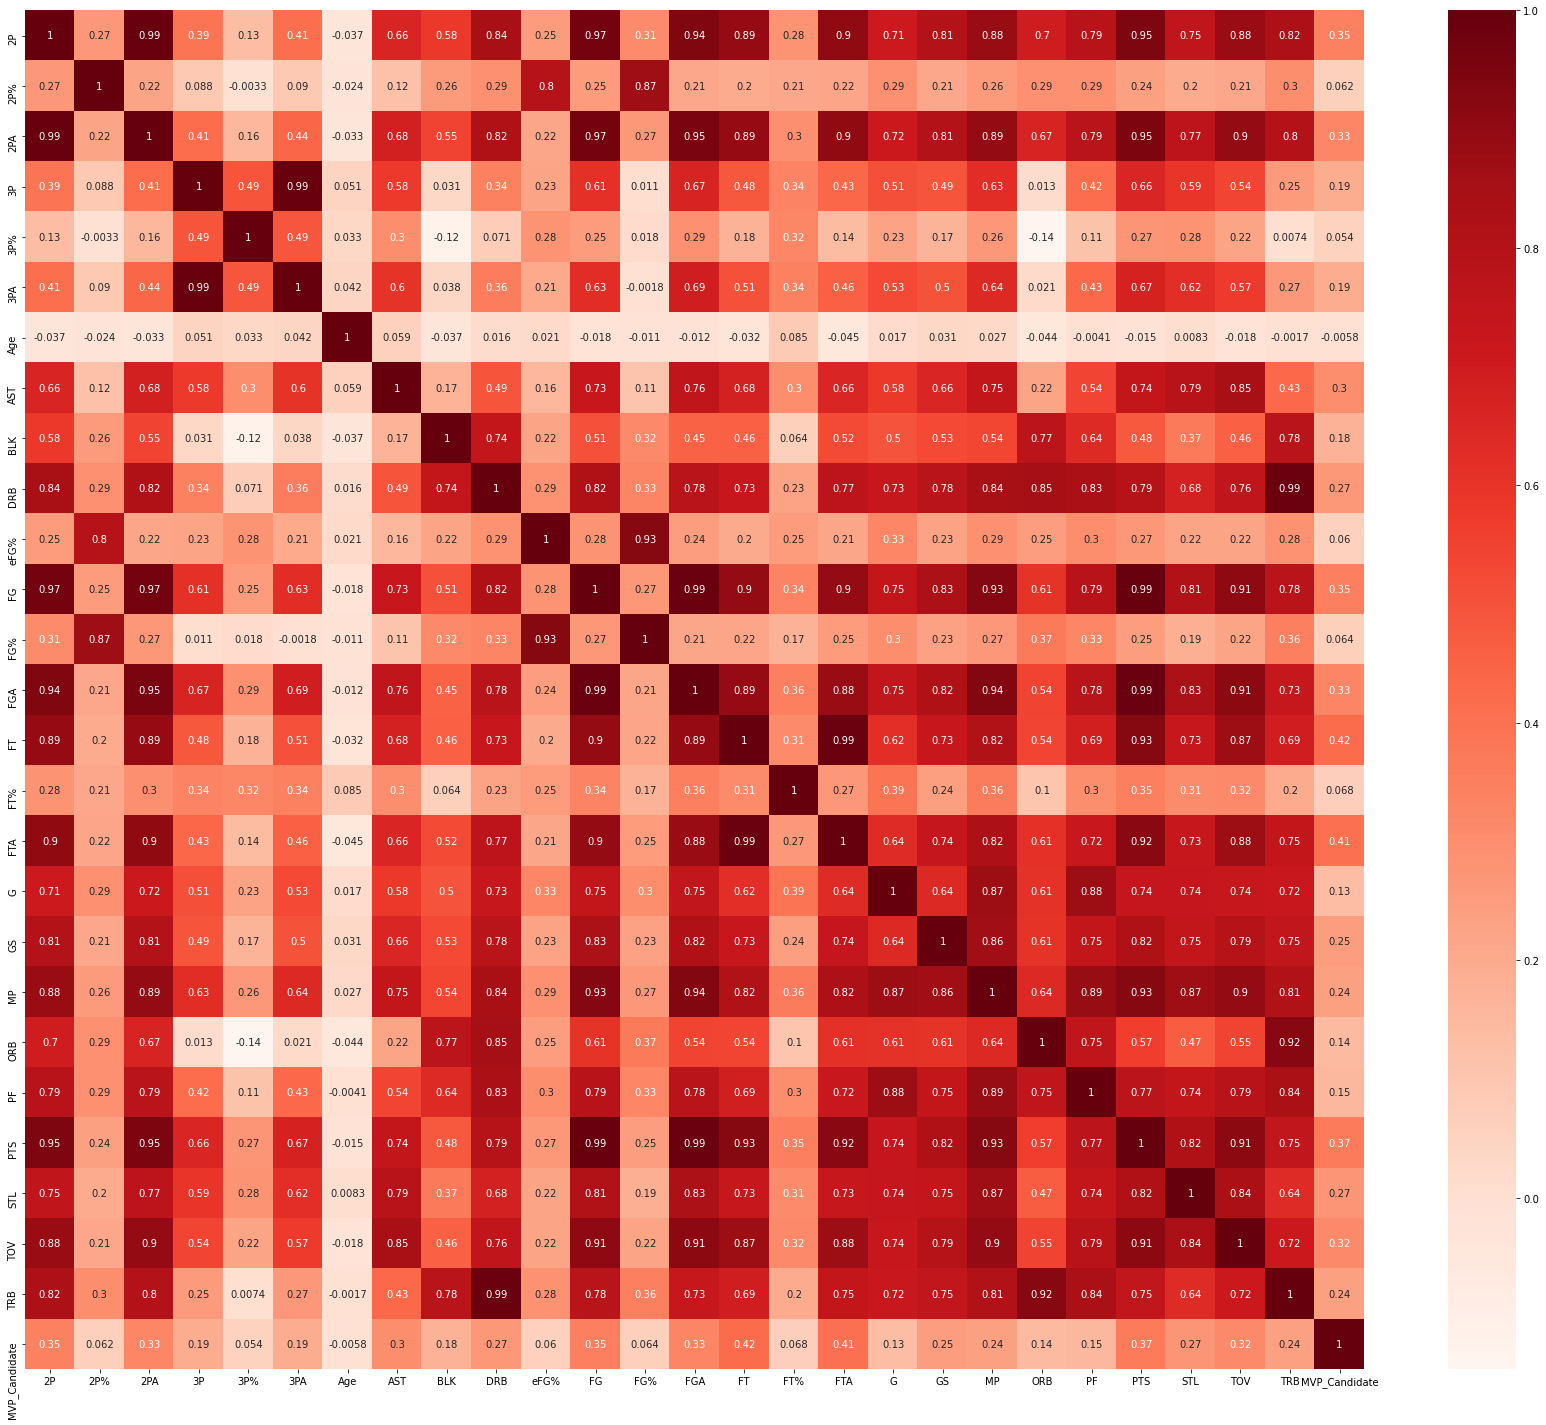

In [62]:
## CORRELATION MATRIX FOR BASE STATS

import seaborn as sns
import statsmodels.api as sm

plt.figure(figsize=(30,25))
cor = mvp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show

In [60]:
## FINDING MOST HIGHLY CORRELATED STATS WITH MVP CANDIDATES

cor_target = abs(cor["MVP_Candidate"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

2P               0.345098
2PA              0.329070
AST              0.300720
FG               0.349345
FGA              0.330406
FT               0.421192
FTA              0.409318
PTS              0.368598
TOV              0.319607
MVP_Candidate    1.000000
Name: MVP_Candidate, dtype: float64

In [64]:
print(mvp[["FGA","2P"]].corr())
print(mvp[["FGA","AST"]].corr())
print(mvp[["FGA","FG"]].corr())
print(mvp[["FGA","2PA"]].corr())
print(mvp[["FGA","FT"]].corr())
print(mvp[["FGA","FTA"]].corr())
print(mvp[["FGA","PTS"]].corr())
print(mvp[["FGA","TOV"]].corr())

         FGA       2P
FGA  1.00000  0.93749
2P   0.93749  1.00000
          FGA       AST
FGA  1.000000  0.755038
AST  0.755038  1.000000
          FGA        FG
FGA  1.000000  0.990172
FG   0.990172  1.000000
          FGA       2PA
FGA  1.000000  0.952732
2PA  0.952732  1.000000
          FGA        FT
FGA  1.000000  0.889033
FT   0.889033  1.000000
          FGA       FTA
FGA  1.000000  0.879842
FTA  0.879842  1.000000
          FGA       PTS
FGA  1.000000  0.990299
PTS  0.990299  1.000000
          FGA       TOV
FGA  1.000000  0.914451
TOV  0.914451  1.000000


In [65]:
print(mvp[["AST","TOV"]].corr())

          AST       TOV
AST  1.000000  0.847076
TOV  0.847076  1.000000
